In [2]:
import pandas as pd

# Load the dataset
#  use encoding='latin-1' to correctly decode special characters
df = pd.read_csv("C:/Users/Nidhi/spam_detection/spam.csv", encoding='latin-1')

# Display first 5 rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# data cleaning

# Keep only relevant columns
df = df[['v1', 'v2']]

# Rename columns to 'label' and 'message'
df.columns = ['label', 'message']

# Check again
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop any missing values (optional)
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm clean shape
print(df.shape)


label      0
message    0
dtype: int64
(5169, 2)


In [6]:
import string #for punctuations
import nltk #Natural Language Toolkit, processing human language data
from nltk.corpus import stopwords #list of stopword
nltk.download('stopwords')

# stop words like is, the, and
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # 3. Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # 4. Re-join cleaned words
    return ' '.join(words)

# Apply preprocessing
# create new column 'cleaned'
df['cleaned'] = df['message'].apply(preprocess)

# Preview cleaned column
df[['message', 'cleaned']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,message,cleaned
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

#frequent and rare
# Create the vectorizer
vectorizer = TfidfVectorizer()

# Transform the cleaned text into vectors
X = vectorizer.fit_transform(df['cleaned'])

# Check shape (rows = messages, cols = unique words)
print(X.shape)


(5169, 9376)


In [8]:
from sklearn.preprocessing import LabelEncoder #convert text labels (strings) into integers

le = LabelEncoder()
#fit- finds unique labels in colum, trasform- replaces those labels with no.
y = le.fit_transform(df['label'])  # in df['label'] column: spam = 1, ham = 0 

# Just to confirm
print(le.classes_)  # Output: ['ham', 'spam']
print(set(y))       # Output: {0, 1}


['ham' 'spam']
{np.int64(0), np.int64(1)}


In [11]:
#Split the Data into training and testing
from sklearn.model_selection import train_test_split
#X- featured matrix, i.e. tf-idf vectors
#y- target labels(spam, ham)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test


In [13]:
print(X_train.shape) #80% in training set
print(X_test.shape) #20% in testing set
print(y_train.shape) #training labels
print(y_test.shape) #testing labels


(4135, 9376)
(1034, 9376)
(4135,)
(1034,)


In [14]:
#train the model

In [26]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [20]:
#naive bayes- Works well with word counts or TF-IDF features
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [21]:
#Support Vector Machine (SVM)
from sklearn.svm import LinearSVC
#linear kernel
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)


LinearSVC()

In [28]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:

# Evaluate Models
# Accuracy, Precision, Recall, F1

from sklearn.metrics import classification_report, accuracy_score

# Naive Bayes
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# SVM
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

Accuracy: 0.960348162475822

SVM Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.98      0.84      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy: 0.9748549323017408


In [29]:
# Logistic Regression
y_pred_lr = logistic_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       889
           1       0.93      0.62      0.74       145

    accuracy                           0.94      1034
   macro avg       0.93      0.81      0.85      1034
weighted avg       0.94      0.94      0.93      1034

Accuracy: 0.9400386847195358

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034

Accuracy: 0.9661508704061895


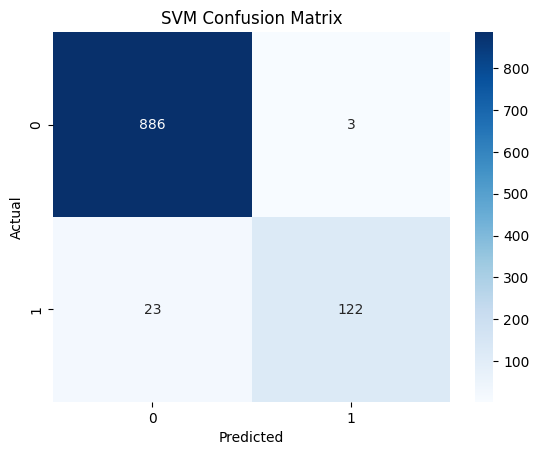

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [34]:
new_message = ["Congratulations! You won a prize. Click here to claim."]

new_message_vector = vectorizer.transform(new_message)
prediction = svm_model.predict(new_message_vector)

if prediction[0] == 1:
    print("This message is SPAM.")
else:
    print("This message is HAM (not spam).")


This message is SPAM.


In [35]:
new_message = ["Hey, are we still meeting for dinner tonight?"]

new_message_vector = vectorizer.transform(new_message)
prediction = svm_model.predict(new_message_vector)

if prediction[0] == 1:
    print("This message is SPAM.")
else:
    print("This message is HAM (not spam).")


This message is HAM (not spam).
